<center><h1>ITIT-4103-2021</h1></center>
<center><h3>Assignment 5</h3></center>

- **Name**: Aadit Agarwal
- **Roll No**: 2018IMT-001
- **Course**: Machine Learning Lab
- **Course Code**: ITIT-4107-2021

## Problem Statement

### Given iris dataset with 3 classes and 4 features such as sepals/petals, Length, width etc. for each flower in the dataset. There are 50 instances per class in the dataset.
### Use Bayes Classifier as your base classifier model. Use 60% samples for training and 40% samples for testing.

## Objectives


1. Perform feature selection on this dataset using forward search.

2. As you select features, until 2 features, plot your right and incorrect classification instances for all classes.

3. For all the set of features selected, plot the accuracies to show the best subset of selected features

## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Data Loading

In [2]:
data = pd.read_csv('iris_data.csv', header=None).values
X = data[:, :4]
Y = data[:, 4:]

## Data Preparation

In [3]:
flower = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

###  • Label Preparation

In [4]:
for i,num in enumerate(Y):
    if Y[i]=='Iris-setosa':
        Y[i]=0
    if Y[i]=='Iris-versicolor':
        Y[i]=1
    if Y[i]=='Iris-virginica':
        Y[i]=2

Y=Y.flatten()

### • Data Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

## Machine Learning Model

In [6]:
class NaiveBayes(object):
    def fit(self, X, Y, smoothing=10e-4):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]

            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:, c] = mvn.logpdf(X, mean=mean, cov=var,allow_singular=True) + np.log(self.priors[c])

        return np.argmax(P, axis=1)

## Base Level Prediction 

In [7]:
model = NaiveBayes()
model.fit(X_train, Y_train)
FIN = model.predict(X_test)

## Feature Selection Based Predictions

In [8]:
used, accuracy, ystr = [], [], []
visit = [0,0,0,0]
ind = 0
X_features = np.zeros((X.shape[0],1))

IndexError: list index out of range

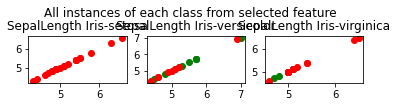

In [9]:
for i in range(0,4):
    
    count = 1
    ti = 1

    for j in range(0,4):

        if visit[j]==1:
            continue
        
        # Training on selected Features
        model = NaiveBayes()
        X_features=np.append(X_features,np.reshape(X[:,j],(len(X[:,0]),1)),axis=1)
        model.fit(X_features[:int(0.6*len(Y)),1:], Y_train)

        # Observing Model Accuracy in Selected Features
        predictions = model.predict(X_features[int(0.6*len(Y)):,1:])
        error=np.mean(predictions==Y_test)
        accuracy.append(error)

        # Plotting Accuracies
        if(i==0):
            C0,C0i,C1,C1i,C2,C2i,=[],[],[],[],[],[]

            for l,num in enumerate(Y_test):
                if num==predictions[l]:
                    if num==0:
                        C0.append(X_features[l,1])
                    elif num==1:
                        C1.append(X_features[l, 1])
                    elif num==2:
                        C2.append(X_features[l,1])
                else:
                    if num==0:
                        C0i.append(X_features[l,1])
                    elif num==1:
                        C1i.append(X_features[l, 1])
                    elif num==2:
                        C2i.append(X_features[l,1])

            plt.suptitle('All instances of each class from selected feature')
            plt.subplot(4,3,count)
            plt.title(str(flower[j])+' '+str(classes[0]))
            plt.scatter(C0,C0,color='green')
            plt.scatter(C0i, C0i,color='red')
            count += 1
            plt.subplot(4, 3, count)
            plt.title(str(flower[j])+' '+str(classes[1]))
            plt.scatter(C1,C1,color='green')
            plt.scatter(C1i, C1i,color='red')
            count += 1
            plt.subplot(4, 3, count)
            plt.title(str(flower[j])+' '+str(classes[2]))
            plt.scatter(C2,C2,color='green')
            plt.scatter(C2i, C2i,color='red')
            count += 1

        elif (i == 1):
            C0x, C0y, C0xi, C0yi, C1x, C1y, C1xi, C1yi, C2x, C2y, C2xi, C2yi = [], [], [], [], [], [], [], [], [], [], [], []

            for l, num in enumerate(Y_test):
                if num == predictions[l]:
                    if num == 0:
                        C0x.append(X_features[l, 1])
                        C0y.append(X_features[l, 2])
                    elif num == 1:
                        C1x.append(X_features[l, 1])
                        C1y.append(X_features[l, 2])
                    elif num == 2:
                        C2x.append(X_features[l, 1])
                        C2y.append(X_features[l, 2])
                else:
                    if num == 0:
                        C0xi.append(X_features[l, 1])
                        C0yi.append(X_features[l, 2])
                    elif num == 1:
                        C1xi.append(X_features[l, 1])
                        C1yi.append(X_features[l, 2])
                    elif num == 2:
                        C2xi.append(X_features[l, 1])
                        C2yi.append(X_features[l, 2])

            plt.suptitle('All instances of each class from selected 2 feature')
            plt.subplot(4, 3, count)
            plt.title(classes[0])
            plt.xlabel(str(flower[used[0]]))
            plt.ylabel(str(flower[j]))
            plt.scatter(C0x, C0y, color='green')
            plt.scatter(C0xi, C0yi, color='red')
            count += 1
            plt.subplot(4, 3, count)
            plt.title(classes[1])
            plt.xlabel(str(flower[used[0]]))
            plt.ylabel(str(flower[j]))
            plt.scatter(C1x, C1y, color='green')
            plt.scatter(C1xi, C1yi, color='red')
            count += 1
            plt.subplot(4, 3, count)
            plt.title(classes[2])
            plt.xlabel(str(flower[used[0]]))
            plt.ylabel(str(flower[j]))
            plt.scatter(C2x, C2y, color='green')
            plt.scatter(C2xi, C2yi, color='red')
            count += 1
        
        #storing the feature set as strings so we can show it in bar plot
        if ti==0:
            ystr.append(str(flower[j]))
        elif ti==1:
            ystr.append(str(flower[used[0]])+','+str(flower[j]))
        elif ti==2:
            ystr.append(str(flower[used[0]])+','+str(flower[used[1]])+','+str(flower[j]))
        elif ti==3:
            ystr.append(str(flower[used[0]]) + ',' + str(flower[used[1]]) + ',' + str(flower[used[2]]) + ','+ str(flower[j]))

        #basically tracks the feature which on adding gives a max accuracy on the model compared to others
        if(error>maxaccuracy):
            maxaccuracy=error
            ind=j

            #delete the added column after use so we can add next feature and test
            X_features=np.delete(X_features, -1, axis=1)

    used.append(ind)#add the feature that is the best
    X_features=np.append(X_features,np.reshape(X[:,ind],(len(X[:,0]),1)),axis=1)#appending that feature that gave us max accuracy
    visit[ind]=1#marking that we visited and used the best feature to our subset
    maxaccuracy=0

    if i==0 or i==1:#showing the plots for 1 feature, 2 feature set
        plt.tight_layout()
        plt.show()

## Plotting Accuracy

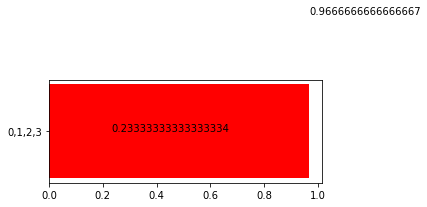

In [10]:
accuracy.append(np.mean(FIN==Y_test))
ystr.append('0,1,2,3')
y_pos = np.arange(len(ystr))
plt.barh(y_pos,accuracy,color='red',linewidth=2)
plt.yticks(y_pos, ystr)
for index, value in enumerate(accuracy):
    plt.text(value, index, str(value))
plt.tight_layout()
plt.show()